In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib import animation, rc

from matplotlib.pylab import rcParams 

from IPython.display import HTML
import warnings

warnings.filterwarnings('ignore')

In [2]:
prices = pd.read_csv('example_sprit_cut_prices.csv', delimiter= ';')
stations = pd.read_csv('example_sprit_cut_station.csv', delimiter = ';')

In [3]:
prices.head()

print(prices.shape)

prices = prices.drop_duplicates()

print(prices.shape)

(2189526, 6)
(1094763, 6)


In [4]:
stations.head()

stations.shape

(824, 12)

In [5]:
total_locations = len(stations.PLACE.unique())

"{} {}".format("Number of different locations :", total_locations)

'Number of different locations : 199'

In [6]:
total_unique_brands = len(stations.BRAND.unique())

"{} {}".format("Number of different brands :", total_unique_brands)

'Number of different brands : 56'

In [7]:
prices["Year"] = pd.DatetimeIndex(prices['DATE_CHANGED']).year
prices['Month'] = pd.DatetimeIndex(prices['DATE_CHANGED']).month

### Minimum Price

In [8]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].min()

E5  E10  DIESEL
Year Month                 
2014 6      -1   -1      -1
     7      -1   -1      -1
     8      -1   -1       0
     9       0    0      -1
     10     -1   -1      -1
     11      0    0       0
     12     -1   -1      -1
2015 1       0    0      -1
     2      -1    0      -1
     3      -1   -1      -1
     4       0    0       0
     5       0    0       0
     6       0    0       0
     7       0    0       0
     8       0    0       0
     9       0    0       0

### Maximum Price 

In [9]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].max()

E5   E10  DIESEL
Year Month                    
2014 6      1759  1709    1559
     7      1999  1999    1999
     8      1709  1679    1589
     9      1719  1690    1519
     10     1699  1659    1549
     11     1669  1629    1489
     12     1579  1539    1469
2015 1      1479  1459    1329
     2      1509  1509    1359
     3      1569  1549    1690
     4      1629  1609    1529
     5      9990  9990    9990
     6      9999  9999    9999
     7      9999  1729   11290
     8      8888  8888    8888
     9      1559  1539    1390

### Average Price

In [10]:
prices.groupby(['Year','Month'])['E5','E10','DIESEL'].mean()

E5          E10       DIESEL
Year Month                                       
2014 6      1598.534868  1535.891866  1394.552516
     7      1583.968173  1522.107704  1376.994764
     8      1552.056125  1501.575666  1378.495019
     9      1539.461312  1500.394263  1368.204396
     10     1492.480020  1453.383012  1330.395867
     11     1450.136347  1411.102288  1310.233628
     12     1335.548191  1296.520389  1210.912538
2015 1      1267.478287  1244.272488  1137.343149
     2      1327.899057  1308.372674  1198.542930
     3      1381.895002  1362.246149  1216.210444
     4      1423.680114  1404.087015  1226.424786
     5      1456.904420  1437.277901  1255.871459
     6      1461.503672  1441.882291  1236.619272
     7      1467.063614  1447.190576  1202.538669
     8      1395.837324  1376.111720  1142.557685
     9      1336.077479  1316.550204  1140.952427

In [47]:
#Merging both the tables
mergedData = pd.merge(prices, stations, left_on = 'STID', right_on = 'ID')

In [48]:
mergedData

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Year,Month,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
5,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01.000000,1,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
6,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
7,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
9,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01.000000,21,2014,10,01bf5a06-4248-43a5-9524-56123fa3ab2f,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847


In [50]:
#Making the Place, Brand and Name in Uppercase to avoid duplicates.
mergedData['PLACE'] = mergedData['PLACE'].str.upper()
mergedData['BRAND'] = mergedData['BRAND'].str.upper()
mergedData['NAME'] = mergedData['NAME'].str.upper()

In [55]:
#Which city sells most quantity of Fuel?

placeFC = mergedData.groupby(['PLACE'])['CHANGED'].sum().sort_values( ascending=False)
print (placeFC)

PLACE
KARLSRUHE                  4091704
LUDWIGSHAFEN               2622298
MANNHEIM                   2534474
KAISERSLAUTERN             2026238
WORMS                      1521570
SPEYER                     1027170
PIRMASENS                  1022388
RASTATT                    1000506
LANDAU                      871200
FRANKENTHAL                 817600
NEUSTADT                    754986
HASSLOCH                    583528
LAMPERTHEIM                 560134
ETTLINGEN                   514308
WOERTH                      463068
GERMERSHEIM                 432472
GERNSHEIM                   426554
EDENKOBEN                   379512
PHILLIPSBURG                374900
ALZEY                       356468
MUTTERSTADT                 342678
SCHIFFERSTADT               339320
LANDSTUHL                   334210
KIRCHHEIMBOLANDEN           318606
RAMSTEIN                    293450
EDESHEIM                    293240
SCHWEGENHEIM                288382
BÜRSTADT                    277310
BIBLIS        

(0, 10)

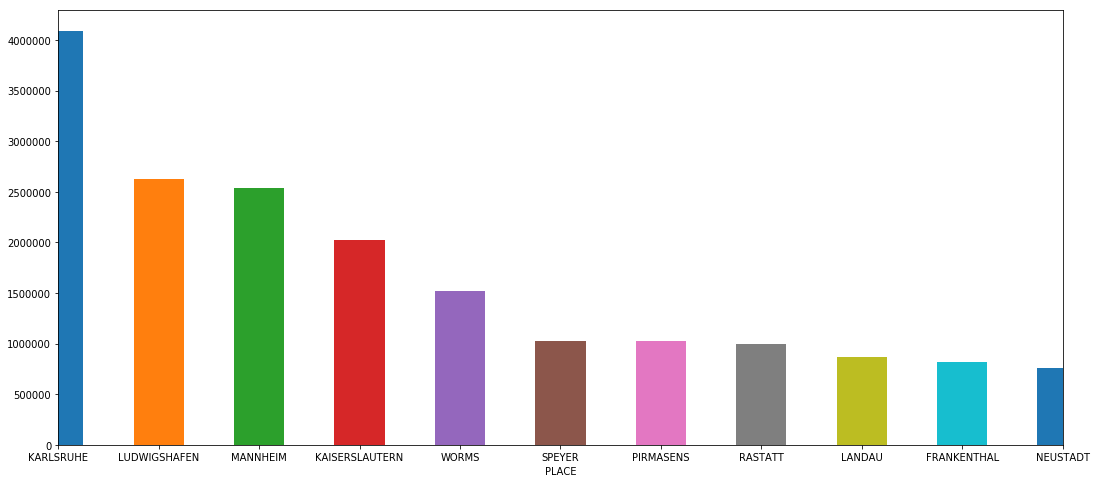

In [72]:
ax = placeFC.plot.bar(x='PLACE', y='CHANGED', rot=0)
ax.set_xlim(0,10)

In [56]:
#Which Brand sells most quantity of Fuel?

brandFC = mergedData.groupby(['BRAND'])['CHANGED'].sum().sort_values( ascending=False)
print (brandFC)

BRAND
SHELL                                                 7306686
ARAL                                                  7031056
ESSO                                                  4405176
AVIA                                                  4242918
TOTAL                                                 2984250
JET                                                   2651048
BFT                                                   1896454
AGIP                                                  1379984
OMV                                                   1129868
SUPERMARKT-TANKSTELLE AM REAL- MARKT                   985866
OIL!                                                   793238
HEM                                                    488906
SB                                                     472722
T                                                      415452
SUPERMARKT-TANKSTELLE                                  399716
ED                                                     357054
FR

(0, 10)

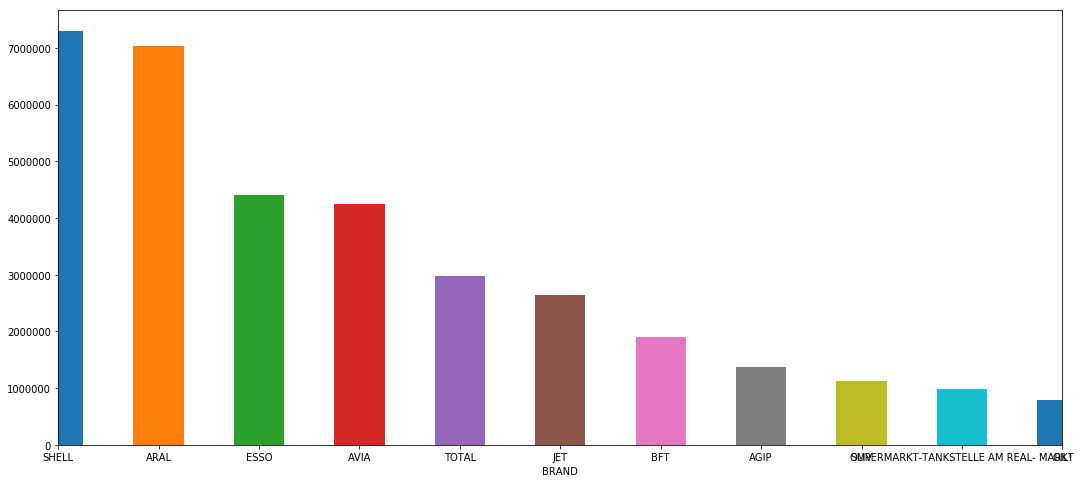

In [74]:
ax = brandFC.plot.bar(x='BRAND', y='CHANGED', rot=0)
ax.set_xlim(0,10)

In [57]:
#Which Fuel Station sells most quantity of Fuel?

nameFC = mergedData.groupby(['NAME'])['CHANGED'].sum().sort_values( ascending=False)
print (nameFC)

NAME
ARAL TANKSTELLE                                                      6976826
ESSO TANKSTELLE                                                      4405176
PREIS TANKSTELLE                                                      247824
TOTAL EDESHEIM                                                        234612
TOTAL WOERTH                                                          229978
AVIA SERVICESTATION                                                   219800
TOTAL RASTATT                                                         218362
ZG RAIFFEISEN TANKSTELLE KARLSRUHE                                    215806
AVIA PHILLIPSBURG                                                     187866
AVIA PHILLIPSBURG-RHEINSHEIM                                          187034
TOTAL MANNHEIM                                                        180536
AVIA KARLSRUHE-NORDWESTSTADT                                          172094
AVIA AU AM RHEIN                                                      1

(0, 10)

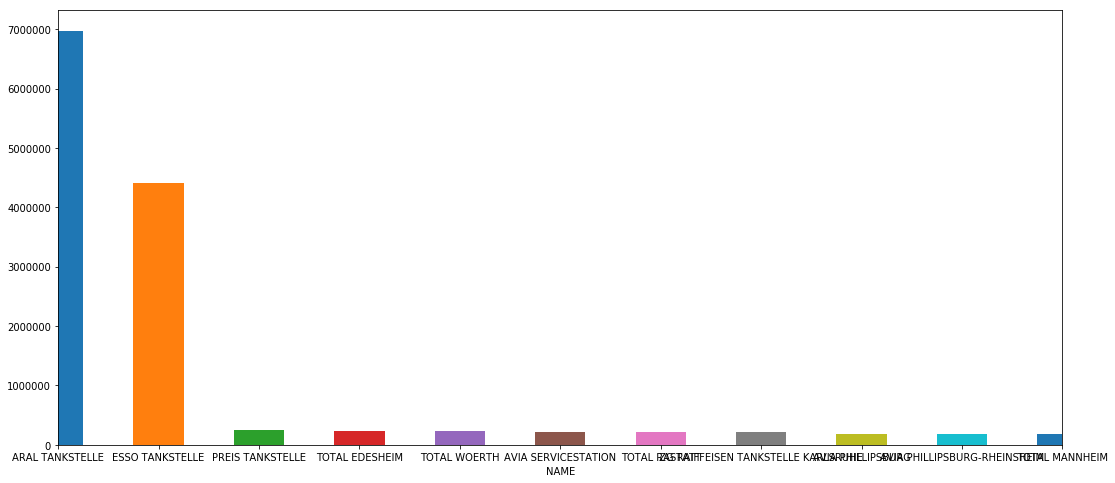

In [75]:
ax = nameFC.plot.bar(x='NAME', y='CHANGED', rot=0)
ax.set_xlim(0,10)


In [76]:
prices.columns

df = prices[['E5','E10','DIESEL','DATE_CHANGED']]

df['DATE_CHANGED'] = pd.to_datetime(df['DATE_CHANGED'])

df = df.set_index('DATE_CHANGED')

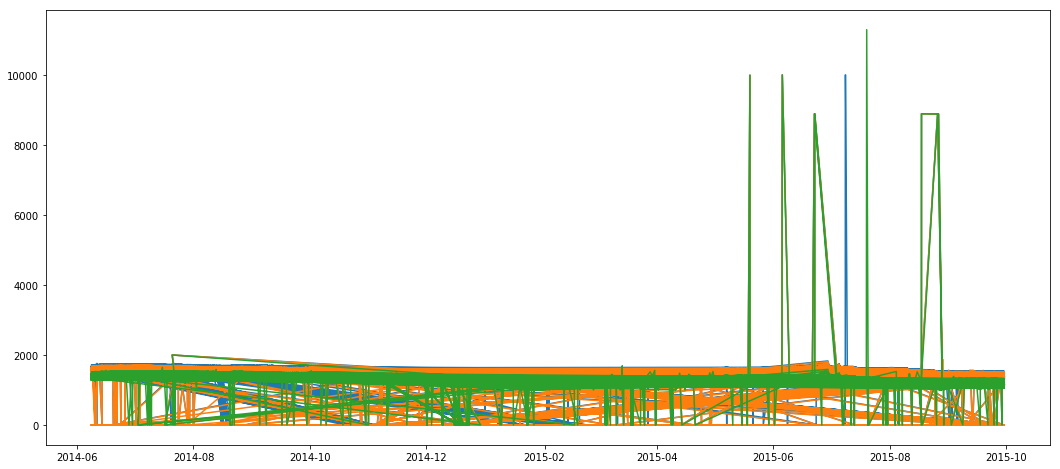

In [77]:
rcParams['figure.figsize'] = 18, 8 

plt.plot(df['E5'])

plt.plot(df['E10'])

plt.plot(df['DIESEL'])

Outliers in the Price , either need to remove or standardize the data for predictive model

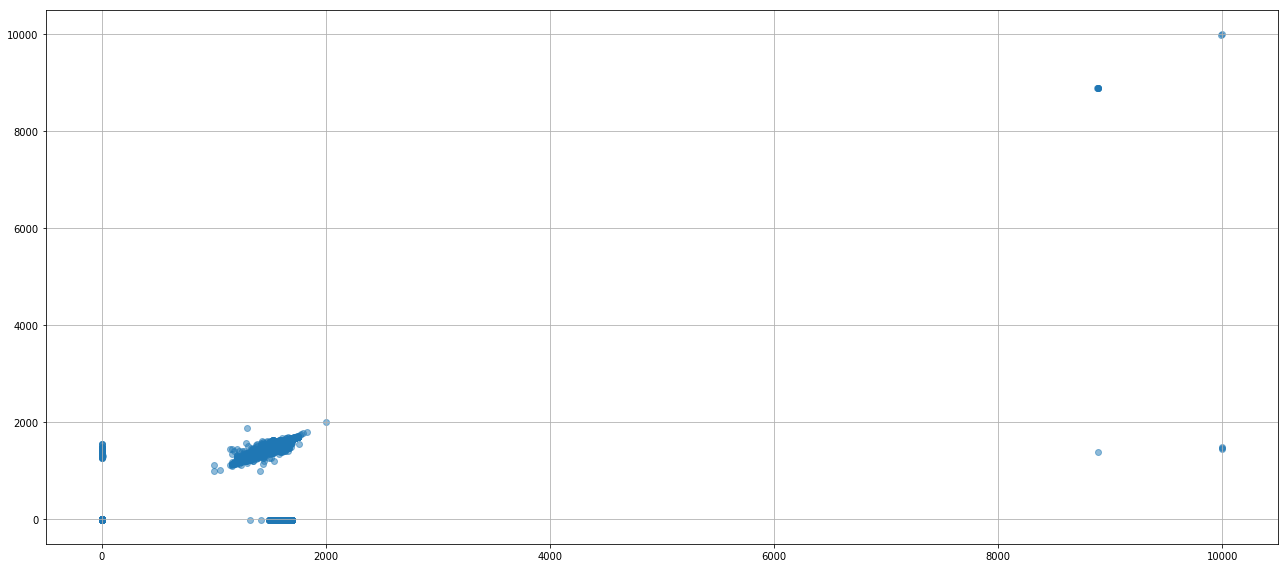

In [78]:
fig, ax = plt.subplots()
ax.scatter(df['E5'], df['E10'], alpha=0.5)


ax.grid(True)
fig.tight_layout()

plt.show()